<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/BearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.5 MB/s 
     |████████████████████████████████| 189 kB 37.4 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 51 kB 236 kB/s 


In [2]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *

Mounted at /content/gdrive


In [3]:
path = Path('bears')
# path variable has a method Path that has the value 'bears' director

if not path.exists():
  #this if statement checks whether the 'bears' directory exists if not it returns a method mkdir() that creates a directory in the drive

  path.mkdir()

In [ ]:
!pip install jmd_imagescraper

#this talks to the shell and installs a python >>> lib/ package that helps us fetch images from the web


In [5]:
from jmd_imagescraper.core import *

from pathlib import Path

In [6]:
root = Path.cwd()/"bears"

In [ ]:
duckduckgo_search(root, "grizzly", "grizzly bears", max_results=150)
duckduckgo_search(root, "teddy bear", "teddy bears", max_results=150)
duckduckgo_search(root, "black bear", "black bears", max_results=150)

#teddy bear , teddy bears
#black bear , black bears

In [25]:
bears = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed =42),
    get_y = parent_label, 
    item_tfms = Resize(128))
"""
 This variable contains a method called DataBlock that is used to categorize our data into classes
 get_items  variable has a method get_image_files that is used to fetch images from our files directory
 splitter =(as with every machine learning model before we start training we have to split the data into 3 parts or two depending on the task 
 and the developer. Here I used a method called RandomSplitter to split my data into 2 sets, the validation set that is used to evaluate the perfomance 
 of my model and the training set that is used during training by the model to learn.)
 The test test is the third set that is kept aside and is usually used after the training is done to see how well my machine learning model generalizes in
 unseen data
 The essence of splitting the dataset is to keep track of the perfomance of the model and also the measure the quality of our model
 """

#dls = bears.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)
#learn = cnn_learner(dls, resnet50, metrics=error_rate)
#learn.fine_tune(7)



'\n This variable contains a method called DataBlock that is used to categorize our data into classes\n get_items  variable has a method get_image_files that is used to fetch images from our files directory\n splitter =(as with every machine learning model before we start training we have to split the data into 3 parts or two depending on the task \n and the developer. Here I used a method called RandomSplitter to split my data into 2 sets, the validation set that is used to evaluate the perfomance \n of my model and the training set that is used during training by the model to learn.)\n The test test is the third set that is kept aside and is usually used after the training is done to see how well my machine learning model generalizes in\n unseen data\n The essence of splitting the dataset is to keep track of the perfomance of the model and also the measure the quality of our model\n '

In [27]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), 
                  batch_tfms = aug_transforms()
                  )
dls = bears.dataloaders(path)
#dls.train.show_batch(max_n= 8, nrows=2, unique=True)
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(7)



epoch,train_loss,valid_loss,error_rate,time
0,0.864632,0.052660,0.011236,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.315123,0.028670,0.022472,00:12
1,0.196329,0.060622,0.033708,00:12
2,0.166756,0.092484,0.033708,00:12
3,0.144596,0.142520,0.033708,00:12
4,0.118112,0.070240,0.022472,00:12
5,0.094394,0.035121,0.011236,00:12
6,0.083659,0.019890,0.011236,00:12


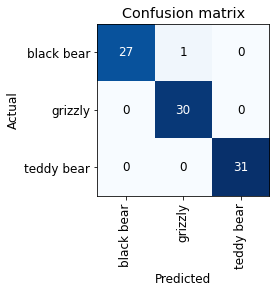

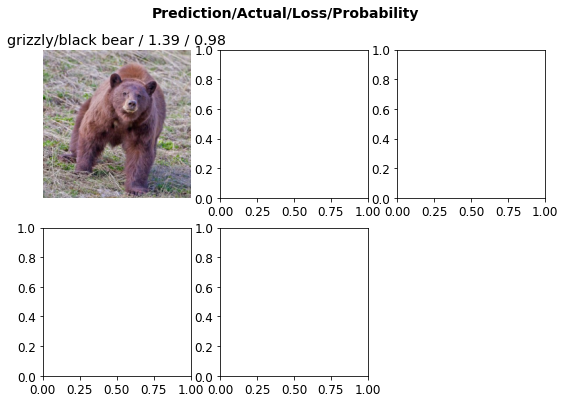

In [28]:
#Visual statistics of our model's results

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=2)

In [ ]:
from fastai.vision.widgets import * 
#We import a widget that is a tool used to clean our data by changing labels and deleting unwanted data that could affect our machine
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
for idx in cleaner.delete():cleaner.fns[idx].unlink()
#this deletes images that have been selected to be deleted by the cleaner


In [32]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]),path/cat)

In [34]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [70]:
#uploader = widgets.FileUpload()
#uploader

In [71]:
#img = PILImage.create(uploader.data[0])
#img.to_thumb(192, 192)

In [42]:
#learn_inf.predict(img)

('black bear', TensorBase(0), TensorBase([9.9945e-01, 5.5069e-04, 2.7280e-07]))

In [44]:
learn_inf.dls.vocab

['black bear', 'grizzly', 'teddy bear']

In [45]:
btn_upload = widgets.FileUpload()


In [46]:
btn_upload

FileUpload(value={}, description='Upload')

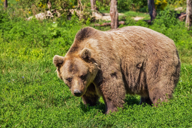

In [49]:
img = PILImage.create(btn_upload.data[-1])
img.to_thumb(192,192)

In [64]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [53]:
pred, pred_idx, probs = learn_inf.predict(img)


In [54]:
lbl_pred = widgets.Label()

In [55]:
lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability:1.0000')

In [58]:
from fastai.vision.widgets import *

btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [68]:
def on_click_classify(change):
   img = PILImage.create(btn_upload.data[0])
   out_pl= widgets.Output()
   out_pl.clear_output()
   with out_pl: display(img.to_thumb(128,128))
   pred, pred_idx, probs = learn_inf.predict(img)
   lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'



btn_run.on_click(on_click_classify)



In [72]:
VBox([widgets.Label('Select your bear!'),btn_upload, btn_run, out_pl, lbl_pred])



In [73]:
!pip install viola

In [74]:
!jupyter serverextension enable viola --sys-prefix

Enabling: viola
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension viola
      X is viola importable?
